In [2]:
import pandas as pd

# Load adult.data
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
adult_data = pd.read_csv('adult.data', names=columns, na_values=' ?', skipinitialspace=True)

# Load adult.test
adult_test = pd.read_csv('adult.test', names=columns, na_values=' ?', skipinitialspace=True, skiprows=1) 
# Combine both datasets
Data_set = pd.concat([adult_data, adult_test], ignore_index=True)
Data_set.reset_index(drop=True,inplace=True)
Data_set

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [3]:
print("No of rows in dataset before preprocessing : ", len(Data_set))

No of rows in dataset before preprocessing :  48842


### Find duplicates

In [4]:
Data_set.duplicated().values.any()

True

In [5]:
# Drop duplicates
Data_set_no_duplicates = Data_set.drop_duplicates()
Data_set_no_duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
print("No of rows in dataset after removing duplicates : ", len(Data_set_no_duplicates))

No of rows in dataset after removing duplicates :  48813


### Finding null values

In [7]:
# Find rows containing '?'
null_values = Data_set_no_duplicates.isin(['?']).any(axis=1)

# Count the number of rows with '?'
no_null_values = null_values.sum()
print("Number of rows containing '?' before dropping:", no_null_values)



Number of rows containing '?' before dropping: 3619


### Dropping null values

In [8]:
# Drop rows with '?'
null_df2 = Data_set_no_duplicates[~null_values]

# Reset index after drop
no_null_df2 = null_df2.dropna().reset_index(drop=True)

# Check the number of rows after dropping
print("Number of rows in dataset after dropping rows with '?':", len(no_null_df2))

no_null_df2

Number of rows in dataset after dropping rows with '?': 45194


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
45190,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
45191,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
45192,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Summary of the dataset

In [9]:
no_null_df2.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45194.000000,4.519400e+04,45194.000000,45194.000000,45194.000000,45194.000000
mean,38.551755,1.897379e+05,10.119109,1102.112736,88.650308,40.941209
std,13.215806,1.056407e+05,2.552057,7508.705003,405.075515,12.006449
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173922e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# Summary of the dataset
print("Summary of the dataset:")

# Statistical summary of numerical features
print("\nStatistical summary of numerical features:")
(no_null_df2.describe())

Summary of the dataset:

Statistical summary of numerical features:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45194.000000,4.519400e+04,45194.000000,45194.000000,45194.000000,45194.000000
mean,38.551755,1.897379e+05,10.119109,1102.112736,88.650308,40.941209
std,13.215806,1.056407e+05,2.552057,7508.705003,405.075515,12.006449
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173922e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# Summary of categorical features
print("\nSummary of categorical features:")
(no_null_df2.describe(include=['object']))


Summary of categorical features:


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,45194,45194,45194,45194,45194,45194,45194,45194,45194
unique,7,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33281,14777,21048,6015,18659,38877,30509,41270,22633


### Standard deviation and mean before standard scalar

Standard Deviation of each numeric column:
age                   13.215806
fnlwgt            105640.654414
education-num          2.552057
capital-gain        7508.705003
capital-loss         405.075515
hours-per-week        12.006449
dtype: float64


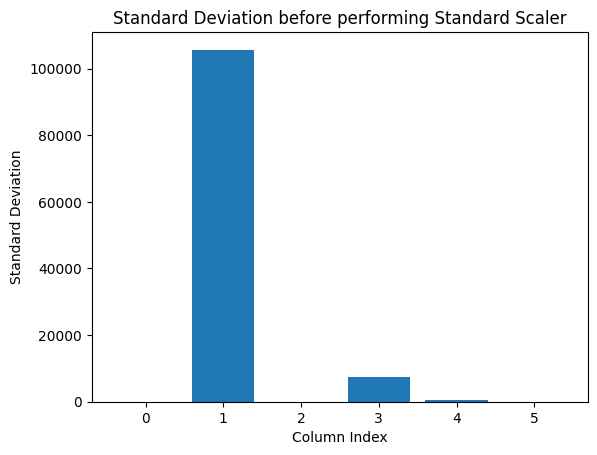

In [13]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = no_null_df2.select_dtypes(include=['int64', 'float64'])

# Calculate the standard deviation of numeric columns
std_deviation_numeric = numeric_columns.std()

# Display the standard deviation for each numeric column
print("Standard Deviation of each numeric column:")
print(std_deviation_numeric)

plt.bar(range(len(std_deviation_numeric)), std_deviation_numeric)
plt.title("Standard Deviation before performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Standard Deviation")
plt.show()


Mean of each numeric column:
age                   38.551755
fnlwgt            189737.853056
education-num         10.119109
capital-gain        1102.112736
capital-loss          88.650308
hours-per-week        40.941209
dtype: float64


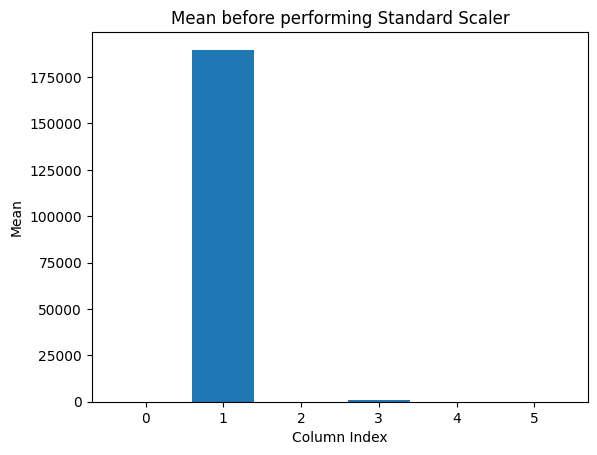

In [14]:
# Calculate the mean of numeric columns
mean_values = numeric_columns.mean()

# Display the mean for each numeric column
print("Mean of each numeric column:")
print(mean_values)

# Plot the mean of all columns
plt.bar(range(len(mean_values)), mean_values)
plt.title("Mean before performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Mean")
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns using StandardScaler
scaled_data = scaler.fit_transform(no_null_df2.select_dtypes(include=['int64', 'float64']))

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=no_null_df2.select_dtypes(include=['int64', 'float64']).columns)

# Reset index of df2
no_null_df2.reset_index(drop=True, inplace=True)

# Concatenate the scaled numeric columns with non-numeric columns
final_scaled_data = pd.concat([scaled_df, no_null_df2.select_dtypes(exclude=['int64', 'float64'])], axis=1)

# Display the dataset after standard scaling
print("Dataset after standard scaling:")
(final_scaled_data)


Dataset after standard scaling:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,0.033918,-1.062310,1.128863,0.142754,-0.218851,-0.078393,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,0.866264,-1.007453,1.128863,-0.146780,-0.218851,-2.327209,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,-0.041750,0.245251,-0.438517,-0.146780,-0.218851,-0.078393,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,1.093267,0.425818,-1.222207,-0.146780,-0.218851,-0.078393,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,-0.798428,1.407344,1.128863,-0.146780,-0.218851,-0.078393,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,-0.420089,0.525118,1.128863,-0.146780,-0.218851,-0.078393,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K.
45190,0.033918,0.243102,1.128863,-0.146780,-0.218851,-0.411551,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K.
45191,-0.041750,1.753560,1.128863,-0.146780,-0.218851,0.754502,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K.
45192,0.412257,-1.001963,1.128863,0.579719,-0.218851,-0.078393,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K.


### Mean and standard deviation after standard scalar

In [40]:
# Selecting numerical columns for which we want to calculate mean and standard deviation
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Calculate mean and standard deviation of each feature in the scaled numerical columns
mean_values = scaled_df[numerical_columns].mean()
std_values = scaled_df[numerical_columns].std()

# Display mean and standard deviation of each feature
print("Mean values of each feature after standard scaling:")
print(mean_values)
print("\nStandard deviation of each feature after standard scaling:")
print(std_values)


Mean values of each feature after standard scaling:
age               1.131988e-17
fnlwgt            8.136166e-18
education-num    -2.822110e-17
capital-gain      9.040184e-18
capital-loss     -2.727777e-17
hours-per-week    2.672750e-17
dtype: float64

Standard deviation of each feature after standard scaling:
age               1.000011
fnlwgt            1.000011
education-num     1.000011
capital-gain      1.000011
capital-loss      1.000011
hours-per-week    1.000011
dtype: float64


# Building predictive model using Random Forest

### Split into train and test 

In [41]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = final_scaled_data.drop(columns=['income'])  # Features
y = final_scaled_data['income']  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (36155, 14)
Shape of X_test: (9039, 14)
Shape of y_train: (36155,)
Shape of y_test: (9039,)


### Fit the classifier into training set